# Introduction

*Notebook author and repo contributor*: Jeff Damasco

*Repo creator and contributor*: Hank Hinnefeld

Hank has a couple examples on how to use his drivers, so you should look at those too. There are a couple of concepts that are not mentioned, like the use of object-oriented programming and the importation of various modules. I'll do my best to explain things further so that you understand just enough of the why; if there is something that is not clear, please let me know so I can improve this document.

# Purpose

In general, writing/typing out a complex program is much easier to read than decoding literal spaghetti code, which easily occurs in LabVIEW. There is also, of course, the issue of needing to buy and upgrade LabVIEW every year. The former is not typically a huge issue, though the latter becomes annoying when programs need to be updated yearly to stay compatible. Thankfully, Python does not need to be upgraded in the same way, and the upgrades that do occur typically will not affect the syntax.

I'm hoping that this will make data acquisition, manipulation, and presentation/visualization a lot more transparent to the laboratory. There is still a lot of work to be done to control all of the instruments (like the magnet power supplies and temperature controllers), but for the most part, being able to control voltages & currents to obtain transport data should be well within the scope of these programs.

# Requirements

Here I'll be using: https://github.com/masonlab/labdrivers (originally written entirely by Hank Hinnefeld).

Here are drivers external to Python that we need:

1. NI VISA

2. NI DAQmx

The `VISA` driver allows the computer to talk to instruments with GPIB. This should be ready to go for `Python 2.x` and `Python 3.x`.

The `DAQmx` driver allows the computer to talk with the National Instruments DAQ. This should also be ready to go for `Python 2.x` and `Python 3.x`. But be warned that the documentation for DAQmx suggest buil

Here, the main objective of Python is to act as another level of communication so that we can utilize the drivers to control the instruments.

# Contributing

If you would like to contribute to the repo, you can send a pull request. This is particularly helpful if you want to build a wrapper class for a new instrument or if you want to modify features from an already-made class.

If you don't feel skilled enough but still feel that you want to contribute, be on the lookout for bugs. There are a couple types to look out for:

**Compile-time errors** are simply errors where the script stops running because of bad input or because something was the wrong type or size (among many other problems!).

*N.b. technically Python doesn't compile, it interprets. However, there might be some Python functions that wrap C code, and C is a compiler language.*

**Runtime errors** are when the script runs, but the output is not what you would expect. For example, if I expect that an IV-curve gives a linearly dependent and non-zero plot, but all the outputs are zero, there might be something in the script which was coded incorrectly yet stil within the bounds of what is acceptable to the interpreter.

If you find any of these problems, please let someone who is in charge of the repository know so that they can fix it, or create a GitHub account yourself and raise the issue on the repository page: https://github.com/masonlab/labdrivers/issues.

# An in-depth guide to controlling the instrument

What we are doing here is equivalent to finding the libraries of various instruments like the SR830 lock-in amplifier, Keithley 2400 sourcemeter, etc. I will use the SR830 module as an example.

Important note: the notebook is written with the assumption that the file is in the root directory of labdrivers, or that labdrivers is accessible via the Python27 directory.

The workflow here is as follows:

#### From the module, import the constructor

In [1]:
from labdrivers.srs import sr830

To explain this line of code, consider the structure of the labdrivers directory:

```
labdrivers
|
|--- docs
|--- example_nbs
+--- labdrivers
     |
     |--- keithley
     |--- ni
     |--- oxford
     |--- quantum design
     +--- srs
          |
          |--- __init__.py
          |--- sr560.py
          +--- sr830.py
```

`from labdrivers.srs` tells Python to search in `labdrivers/srs`, where the slash that separates the directories is simply replaced by the dot. The details about why we can do this are not important.

*N.b. If you're particularly observant, you'll see that `labdrivers` actually sits in another directory `labdrivers`. The reason why we don't call upon the first one is because this notebook lives in the top-most `labdrivers`, so `labdrivers.srs` is called from the perspective of the notebook.*

`import sr830` tells Python to import the class sr830.

#### Given the GPIB address, instantiate a SR830 object

In [2]:
sr830_gpib_address = 8

lock_in = sr830(sr830_gpib_address)

The GPIB address is something you set on the machine. Make sure this is identical or else your program will not work.

`lock_in` is simply an instance of the sr830 class (the lingo in object-oriented programming is that you "instantiate an `sr830` object") and you can call it whatever you like. In the example, `lock_in` connects to the SR830 that has the address `8`. In principle, if you have multiple instruments, you only need to import the module once, and you can create as many instances as you need to, for example:

```python
from labdrivers.srs import sr830

lock_in_A = sr830(8)
lock_in_B = sr830(9)
```

#### Set up the instrument with whatever parameters you need

In [6]:
lock_in.setFrequency(137.9)
lock_in.setAmplitude(0.05)
lock_in.setInput(0) # corresponds to 'A' input
lock_in.setTimeConst(9) # corresponds to 300 ms

Each instance of an instrument has a unique set of functions associated with it, so you should look at the various files in `labdrivers/labdrivers` so that you can see how exactly to use them.

As you would expect of the lock-in amplifier, you (as the experimentalist) should be able to set the amplifier's frequency, its voltage output, and determine how you would like it to take inputs. The dot notation (e.g. `lock_in[dot]setFrequency(137.9)`) tells the object that I called "`lock_in`" to use the function that follows the dot. The `setFrequency` method also takes in a value, which is the frequency (in Hertz) that you would typically set by hand. There should be a wide variety of functions (the obviously-named "getters" and "setters") to help control your instrument; these functions are found in the class definitions.

Back to the example. The numbers in the frequency and amplitude setters are more or less obvious. The frequency is set in Hertz, and the amplitude refers to the output voltage amplitude, which is in Volts.

However, some of the parameters are not entirely obvious, and so you should look through the Python file (for the SR830: https://github.com/masonlab/labdrivers/blob/master/labdrivers/srs/sr830.py) to figure out if some parameters are coded, like in the time constants. Also note that for all of these parameters, you must know the units of your inputs so that you can properly interpret the data!

If you need to investigate the inner workings of other instrument modules, you should be able to look through the directory and find the proper class file.

#### Take a piece of data

In [7]:
x_data = lock_in.getSinglePoint(1)
theta_data = lock_in.getSinglePoint(4)

Here are a couple more examples of a defined instance of an `sr830` object using a function to perform an action. In this case, the action is to obtain some output data. The parameters can be found in the class file, of course, but to avoid the need of looking it up, the `1` input indicates you want to observe the `X` output of the data, whereas the `4` input indicates you want to observe the `Theta` output of the data.

# Data storage and manipulation

Here is a small walkthrough on how to use the pandas package for creating and modifying data tables.

#### Importing some critical libraries

In [2]:
import pandas as pd
import numpy as np
from __future__ import division

Some notes:

1. The first two lines are import statements without `from`s. The previous `import` statements were used in conjunction with a `from` statement, but this is something that is a bit out of the scope of this notebook. You can ask me if you're curious, though.

2. On the first two lines, I create commonly accepted aliases for `pandas` and `numpy`. While it is completely fine to write out `pandas.something` or `numpy.something` every time, it can get annoying, so to increase readability of your code and to save a miniscule amount of time, it is common to write out `pd.something` or `np.something` instead.

3. Line 3 is not necessary, but I will explain why I imported these. The `__future__` module brings `Python 3.x` functionality to `Python 2.7.x`. In short, `Python 3.x` scripts treat division true division instead of a floor function.

I'm going to begin by establishing a pandas DataFrame instance, which is where all the data will come from.

In [32]:
columns = ['Gate Voltage (V)','Bias Voltage (mV)','dI/dV (2e^2/h)']
data = pd.DataFrame(columns=columns)

I created a list of columns knowing what exactly I want to have in my data set. I will have two inputs, the gate voltage and bias voltage, and I expect that I'll have the differential conductance (dI/dV) as the data I'm measuring.

Let's suppose that I have a new row in my data that describes the differential conductance when the gate voltage is -5.35 V and the voltage bias across the sample is 2.45 mV. And let's suppose that the measurement was found to yield 0.7 $2e^2/h$ of conductance. I'm going to create a new record as a DataFrame for reasons that will be slightly more obvious very soon.

In [33]:
new_record = pd.DataFrame(np.array([[-5.35, 2.45, 0.7]]),
                         columns=columns)

*N.b. if you have pieces of data you recorded, like in the `x_data` or `theta_data` examples above, you should write those in place of the numbers above.*

Note here the use of `np.array([[-5.35, 2.45, 0.7]])`. In general you will want to create data records like this because it is the only way that a `pandas.DataFrame` object can take in new data. What that line of code actually means is that you have a tensor that is of size `(3,1)`. The inner `list` of `[-5.35, 2.45, 0.7]` represents a row in a matrix. The matrix is defined when you surround that list of numbers with another set of square brackets: `[[-5.35, 2.45, 0.7]]`. And finally, to complete its transformation into something usable by the `pandas.DataFrame`, you need to surround that matrix with `np.array(...)`.

The `new_record` also contains an entry for the columns in the `DataFrame` that is exactly the same as the main data set `data`, guaranteeing compatibility upon record appendage.

Prior to adding in a new record, the data table looks like this:

In [34]:
data.head()

Empty DataFrame
Columns: [Gate Voltage (V), Bias Voltage (mV), dI/dV (2e^2/h)]
Index: []

`head` is a function which allows you to check out the first 10 rows of a table. You can actually specify the amount of rows as an argument, but remember that you can only see so much on the output on a notebook or in the console

Here's how to insert a new record:

In [35]:
data = data.append(new_record, ignore_index=True)

The `append` method merely outputs a new DataFrame object, but it does not immediately replace the original. Thus, you must set the DataFrame of your data set to be the output of the appending method. This method takes the following arguments: another DataFrame and whether or not the DataFrame ignores the differences in indices between the DataFrame to be appended and the DataFrame that is appending.

Here we assume that the data to append `new_record` already has the same columns as the data set `data`. If not, then you may have records with `NaN` values, and you will require some extra post-processing.

The effect of the `ignore_index` being set to `True` is not obvious here, but consider the case when the data set `data` has `n` rows; `data` will have indices `0, 1, ... , n`, and appending without ignoring the index will force `data` to have indices `0, 1, ..., n, 0`. In practice, this actually will not affect much, but if you are, for whatever reason, performing data operations that call by the index location, then you might run into a runtime error or a 'compile time' error (noting that Python doesn't actually compile; it interprets). As a suggestion, try to keep data organized and ignore the indices of new records.

That said, here is what the data set `data` looks like after appending a new record:

In [36]:
data.head()

Gate Voltage (V)  Bias Voltage (mV)  dI/dV (2e^2/h)
0             -5.35               2.45             0.7

After you gather all of your data, then you may output the file. Typically the files will be in a comma-separated value (CSV) format, but there are other file types that you could choose from (refer to the Pandas documentation).

Here's how to do it:

In [ ]:
data.to_csv('output_path.csv', sep='\t', index=False)

Here I am not changing the structure of the `data` table, so I do not need to write `data = data.to_csv...`. Instead, consider this as the `data` table copying its contents into a file. In this example, only the file name is given, meaning that the file will be called `output_path.csv` and will be placed in the same directory as this notebook. The parameter `sep` specifies the type of separation that will exist between entries, and the parameter `index` specifies if the indices on the DataFrame should be output as a column with the expected data. For our purposes that is generally undesired (unless you would like to follow the order of data acquisition) so that is set to `False`.

# Automating data acquisition

Knowing all of this information, you should be able to automate data acquisition with typical flow control elements:

* `for`
* `while`

The documentation for these two flow control statements are easily searchable and will not be covered here, but note that how you want to control when to exit a loop is completely up to you. To wit, `for` is usually used when you have a very specific range of values that you must loop over. On the other hand, `while` is typically suited for applications where you are waiting for a certain condition (e.g. when the resistance reaches zero, when the conductance is one quantum of conductance, etc.).

#### When to output data

If you would like to output data as one large mass, that should be done after and outside the flow control loop of choice. However, the main disadvantage here is that if you interrupt the program, you lose the chance to save your data. Thus, it's typically a better choice to output data after each loop iteration. Considering that, you might want to think about using the `with...as...` format, as that is usually faster than using `df.to_csv`. If you consider the number of records in your data, if you have an extremely large data set, then each time that you call `df.to_csv` will be more than the previous time, and that is actually quite inefficient. The preferred method is described in the next subsection.

#### with...as...

Here we import another future module:

In [38]:
from __future__ import with_statement

I won't go in-depth about the internal structure (i.e. the "how") of the `with` statement, but basically it allows for the setting up and tearing down of something even if the contents of the `with` statement do not necessarily work. Of course this raises the question of what exactly goes in the `with` statement. For us, it is placing the data in the file. The file is the thing that we will be setting up and tearing down (mentioned a couple sentences ago).

Here is an example of how it works:

In [ ]:
with open('conductance_list.txt') as f:
    
    for voltage in gate_voltage:
        
        lockin_v = lockin.getSinglePoint(1)
        conductance = calculate_conductance(lockin_v)
        f.write(str(voltage) + ',' + str(conductance))

Translating into English, this reads:

1. We open a file called `conductance_list.txt` and alias it as `f`

2. For every value (which we call the variable `voltage`) in the list called `gate_voltage`, perform the following:

    * Get the voltage from the lock-in amplifier object
    
    * Calculate the sample conductance based on that voltage
    
    * Write a line in the file `f` that contains the current gate voltage value and the calculated conductance, separated by a comma

# Mapping out data

The important modules here are:

In [1]:
import matplotlib.pyplot as plt
import math
import seaborn as sns
%matplotlib inline

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


The `pyplot` module aids in plotting data.

The `math` module is here to assist in some mathematical functions. In principle we could just use numpy, but it's a bit overpowered for looking at a single element.

The `seaborn` module is an extension of the functionality of `matplotlib` and is generally helpful in creating nice data visualizations without much effort on the user's part.

The `%matplotlib inline` line allows us to see the resultant plot in a notebook, though typically you would write a script which would explicitly tell the interpreter to `show()` the plot or or output the plot to a file.

I will generate some data to show an example. I'll make up some data:

In [51]:
example_columns = ['gate_voltage','bias_voltage','conductance']
example_data = pd.DataFrame(columns=example_columns)

for gate in range(-5,6,1):
    
    for bias in range(-5,6,1):
        
        if math.fabs(bias) <= math.fabs(5 - math.fabs(gate)):
            to_insert = pd.DataFrame(np.array([[gate,bias,0]]),
                                        columns=example_columns)
        else:
            to_insert = pd.DataFrame(np.array([[gate,bias,1]]),
                                        columns=example_columns)
            
        example_data = example_data.append(to_insert)
        
example_data.head()

gate_voltage  bias_voltage  conductance
0          -5.0          -5.0          1.0
0          -5.0          -4.0          1.0
0          -5.0          -3.0          1.0
0          -5.0          -2.0          1.0
0          -5.0          -1.0          1.0

I need to convert this into a form that the heatmap will take. This requires *pivoting* a table.

N.b. This is equivalent to converting three columns of data into an xyz matrix in OriginPro.

In [52]:
example_data_pivoted = example_data.pivot(index='gate_voltage',
                                            columns='bias_voltage',
                                            values='conductance')
example_data_pivoted.head()

bias_voltage  -5.0  -4.0  -3.0  -2.0  -1.0   0.0   1.0   2.0   3.0   4.0   5.0
gate_voltage                                                                  
-5.0           1.0   1.0   1.0   1.0   1.0   0.0   1.0   1.0   1.0   1.0   1.0
-4.0           1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0
-3.0           1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0
-2.0           1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0
-1.0           1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0

This should create a diamond. Now I'll try to create a heatmap.

C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


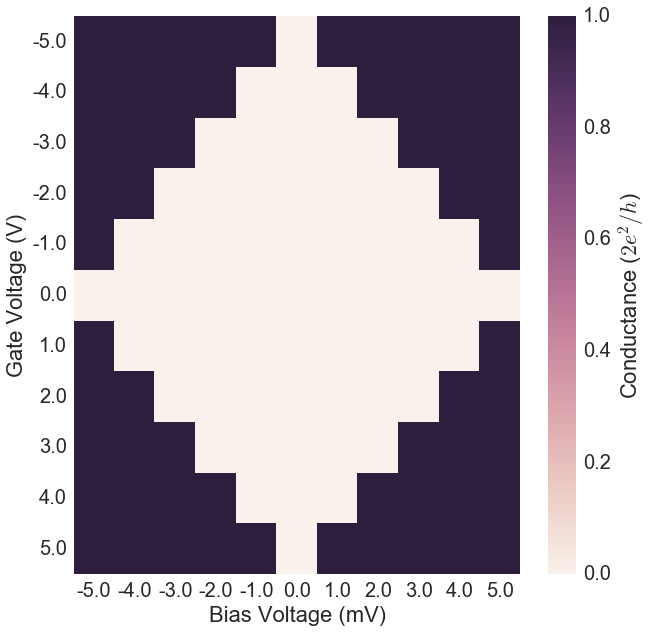

In [34]:
plt.figure(figsize=(10,10))

sns.set(font_scale=2)
sns.heatmap(example_data_pivoted,
            cbar_kws={'label':'Conductance ($2e^2/h$)'})

plt.ylabel('Gate Voltage (V)')
plt.yticks(rotation='horizontal')

plt.xlabel('Bias Voltage (mV)')

This is actually one of the more advanced techniques for creating plots, but 2D plots are common enough in our research group that it is worth walking through how one would actually create the 2D map. There are some parameters that you ought to tune, like the color scheme used or the font sizes.

# Mapping out data point-by-point

To mimic functionality like in LabVIEW, a call can be made to the plots after the appendage of a record. There is already a lot of slowdown between plot calls, so be careful that you plot only what you need.

Here is an example of a 2D sweep where you might want to plot each bias sweep.

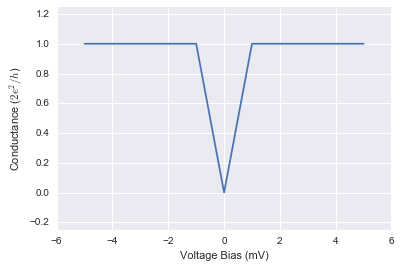

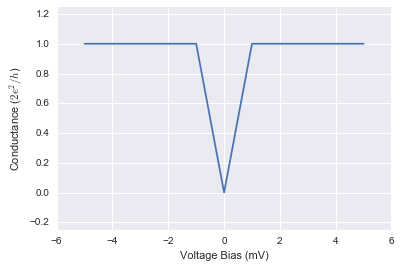

In [3]:
import time
from IPython import display

example_columns = ['gate_voltage','bias_voltage','conductance']
example_data = pd.DataFrame(columns=example_columns)

fig = plt.figure()
ax1 = fig.add_subplot(111)

for gate in range(-5,6,1):
    
    bias_sweep = pd.DataFrame(columns=example_columns)
    
    for bias in range(-5,6,1):
        
        if math.fabs(bias) <= math.fabs(5 - math.fabs(gate)):
            to_insert = pd.DataFrame(np.array([[gate,bias,0]]),
                                        columns=example_columns)
        else:
            to_insert = pd.DataFrame(np.array([[gate,bias,1]]),
                                        columns=example_columns)
            
        example_data = example_data.append(to_insert)
        bias_sweep = bias_sweep.append(to_insert)

        ax1.clear()
        
        plt.subplot(111)
        plt.xlim(-6,6)
        plt.ylim(-0.25,1.25)
        plt.xlabel('Voltage Bias (mV)')
        plt.ylabel('Conductance ($2e^2/h$)')
        
        plt.plot(bias_sweep.bias_voltage, bias_sweep.conductance)

        display.clear_output(wait=True)
        display.display(plt.gcf())

After this, it might be cool to try and setup a heatmap of conductance as a function of bias and gate voltage, though this part still needs some testing.